<a href="https://colab.research.google.com/github/BrunaKrasotaMatos/MineracaoDados/blob/main/VisualizacaoDadosTrilha4_BrunaMatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# ***T4 – Atividade de Aprofundamento***
---

Explorar o dataset da Netflix

In [3]:
# Import de algumas bibliotecas normalmente utilizadas na explocação dos dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# Análise Exploratória de Dados

Vamos trabalhar, primeiramente com a Análise Exploratória de Dados, conhecendo dataset, número de exemplares e tipos de dados. Registre os resultados no Colab/Notebook. Utilize também uma visualização que julgue aderente a esta análise, como as que vimos na trilha 3, sobre análise exploratória.

Em seguida, vamos desenvolver uma visualização de série temporal para finalizar a atividade..

In [4]:
# Lendo a tabela

df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Inicialmente vamos analisar todas as colunas
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
# Foi possível observar que as colunas director,cast,country,date_added,rating e duration	possuem valores nulos
# que vamos precisar tratar
# Vaos calcular a percentagem de valores nulos
# vamos então tentar encontrar a quantidade de valores nulos 
(df.isnull().sum() / len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
# São muitos valores para que simplismente remover. Logo teremos que mexer com a base de dados para incluir valores nesses casos
# Poderíamos adicionar dados usando a probabilidade ou randomicamente, mas como as colunas com informações nulas são de variáveis categóricas, 
# para essa primeira análise não vamos mexer nesses dados

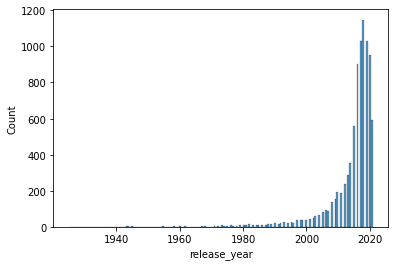

In [8]:
# Analisando os anos em que os conteúdos foram adicionados

sns.histplot(data=df,x="release_year")

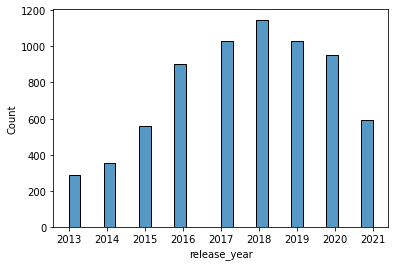

In [10]:
# percebemos alguns outliers 
# Neste caso, seria melhor se alterassemos os dados para considerar os que estão disponíveis do primeiro quartil para frente, 
# já que esses muito antigos não são muito relevantes ara a nossa análise
df_filtered_new = df[df['release_year'] >= df['release_year'].quantile(0.25)] 
sns.histplot(data=df_filtered_new,x="release_year")

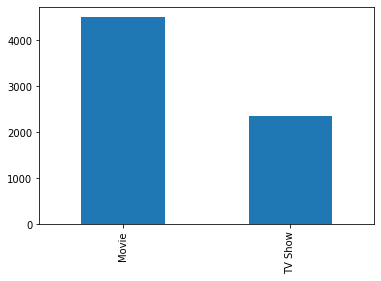

In [11]:
# pudemos observar que o pico de adição de conteúdo foi em 2018
# podemos também analisar se esses conteúdos eram Filves ou não
df_filtered_new.type.value_counts().plot(kind="bar")
plt.show()

In [ ]:
# assim, pudemos perceber que filmes foram adicionados em sua grande maioria.